# 03 - Training Results - Networks Fine-tuned on Selected Loss Function (SnakeCLEF-Reduced)

In [1]:
import os

os.chdir('..')

In [2]:
import numpy as np
import pandas as pd

from src.utils import visualization as viz
from src.dev import results

DATA_DIR = 'data/snake_clef2021_dataset/training_history/baselines_with_loss_mini/'


def get_result_df(df, params):
    group_dict = {
        'EfficientNet-B0': results.filter_items(df, outlen=30, model='efficientnet_b0', **params),
        'ViT-Base-224': results.filter_items(df, outlen=30, model='vit_base_224', **params),

        'EfficientNet-B4': results.filter_items(df, outlen=30, model='efficientnet_b4', **params),
        'NoisyStudent-B4': results.filter_items(df, outlen=30, model='efficientnet_b4_ns', **params),
        'EfficientNetV2-S': results.filter_items(df, outlen=30, model='efficientnetv2_s', **params),

        'ViT-Base-384': results.filter_items(df, outlen=30, model='vit_base_384', **params),
        'DeiT-Base-384': results.filter_items(df, outlen=30, model='deit_base_384', **params),
        'BEiT-Base-384': results.filter_items(df, outlen=30, model='beit_base_384', **params),

        # 'ViT-Large-224': results.filter_items(df, outlen=30, model='vit_large_224', **params),
        'ViT-Large-384': results.filter_items(df, outlen=30, model='vit_large_384', **params)}
    result_df = results.get_metrics_and_time_df(group_dict, primary_metric='f1_score')
    return result_df, group_dict


# load specification and progress data
specs_df = results.load_specs_files(DATA_DIR)
df = results.load_progress_files(specs_df, path=DATA_DIR)
specs_df

,model_name,history_file,specs_name,model,loss,opt,no_epochs,batch_size,total_batch_size,learning_rate,weight,dataset,scheduler,beta,pretrained_checkpoint,input_size,image_mean,image_std,date
0,clef2021_efficientnet_b0_ce_11-10-2021_11-09-53,clef2021_efficientnet_b0_ce_11-10-2021_11-09-5...,clef2021_efficientnet_b0_ce_11-10-2021_11-09-5...,efficientnet_b0,ce,sgd,30,64,64,0.01,none,mini_cleaned,reduce_lr_on_plateau,NaN,tf_efficientnet_b0,224,"[0.485, 0.456, 0.406]","[0.229, 0.224, 0.225]",10-2021_11-09-53
1,clef2021_vit_base_384_ce_12-20-2021_18-12-36,clef2021_vit_base_384_ce_12-20-2021_18-12-36.csv,clef2021_vit_base_384_ce_12-20-2021_18-12-36.json,vit_base_384,ce,sgd,30,32,64,0.01,class_balanced,mini_cleaned,reduce_lr_on_plateau,0.9,google/vit-base-patch16-384,384,"[0.5, 0.5, 0.5]","[0.5, 0.5, 0.5]",20-2021_18-12-36
2,clef2021_deit_base_384_ce_12-21-2021_01-03-57,clef2021_deit_base_384_ce_12-21-2021_01-03-57.csv,clef2021_deit_base_384_ce_12-21-2021_01-03-57....,deit_base_384,ce,sgd,30,32,64,0.01,class_balanced,mini_cleaned,reduce_lr_on_plateau,0.9,facebook/deit-base-patch16-384,384,"[0.485, 0.456, 0.406]","[0.229, 0.224, 0.225]",21-2021_01-03-57
3,clef2021_beit_base_384_ce_12-21-2021_07-57-06,clef2021_beit_base_384_ce_12-21-2021_07-57-06.csv,clef2021_beit_base_384_ce_12-21-2021_07-57-06....,beit_base_384,ce,sgd,30,32,64,0.01,class_balanced,mini_cleaned,reduce_lr_on_plateau,0.9,microsoft/beit-base-patch16-384,384,"[0.5, 0.5, 0.5]","[0.5, 0.5, 0.5]",21-2021_07-57-06
4,clef2021_vit_large_384_ce_12-21-2021_15-41-06,clef2021_vit_large_384_ce_12-21-2021_15-41-06.csv,clef2021_vit_large_384_ce_12-21-2021_15-41-06....,vit_large_384,ce,sgd,30,16,64,0.01,class_balanced,mini_cleaned,reduce_lr_on_plateau,0.9,google/vit-large-patch16-384,384,"[0.5, 0.5, 0.5]","[0.5, 0.5, 0.5]",21-2021_15-41-06
5,clef2021_efficientnet_b4_ce_11-23-2021_15-22-07,clef2021_efficientnet_b4_ce_11-23-2021_15-22-0...,clef2021_efficientnet_b4_ce_11-23-2021_15-22-0...,efficientnet_b4,ce,sgd,30,32,64,0.01,none,mini_cleaned,reduce_lr_on_plateau,NaN,tf_efficientnet_b4,380,"[0.485, 0.456, 0.406]","[0.229, 0.224, 0.225]",23-2021_15-22-07
6,clef2021_efficientnetv2_s_ce_11-23-2021_22-45-37,clef2021_efficientnetv2_s_ce_11-23-2021_22-45-...,clef2021_efficientnetv2_s_ce_11-23-2021_22-45-...,efficientnetv2_s,ce,sgd,30,64,64,0.01,none,mini_cleaned,reduce_lr_on_plateau,NaN,tf_efficientnetv2_s,384,"[0.5, 0.5, 0.5]","[0.5, 0.5, 0.5]",23-2021_22-45-37
7,clef2021_vit_base_224_ce_11-25-2021_21-43-37,clef2021_vit_base_224_ce_11-25-2021_21-43-37.csv,clef2021_vit_base_224_ce_11-25-2021_21-43-37.json,vit_base_224,ce,sgd,30,64,64,0.01,class_balanced,mini_cleaned,reduce_lr_on_plateau,0.9,google/vit-base-patch16-224,224,"[0.5, 0.5, 0.5]","[0.5, 0.5, 0.5]",25-2021_21-43-37
8,clef2021_efficientnet_b4_ns_ce_11-28-2021_15-2...,clef2021_efficientnet_b4_ns_ce_11-28-2021_15-2...,clef2021_efficientnet_b4_ns_ce_11-28-2021_15-2...,efficientnet_b4_ns,ce,sgd,30,32,64,0.01,none,mini_cleaned,reduce_lr_on_plateau,NaN,tf_efficientnet_b4_ns,380,"[0.485, 0.456, 0.406]","[0.229, 0.224, 0.225]",28-2021_15-20-31


,accuracy,top_3,f1_score,mean_epoch_time,total_time
EfficientNet-B0,69.1,80.7,57.5,06m,2h 49m
ViT-Base-224,71.5,82.8,64.7,06m,2h 58m
EfficientNet-B4,73.5,89.2,68.7,12m,5h 59m
NoisyStudent-B4,80.2,91.6,71.0,13m,6h 06m
EfficientNetV2-S,79.4,92.1,70.5,11m,5h 09m
ViT-Base-384,78.5,92.8,73.0,14m,6h 50m
DeiT-Base-384,77.9,94.6,72.2,14m,6h 52m
BEiT-Base-384,83.5,92.7,74.8,16m,7h 43m
ViT-Large-384,84.7,94.6,76.4,35m,17h 24m


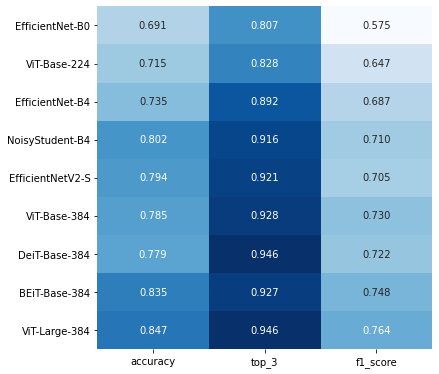

In [3]:
params = dict(loss='ce', opt='sgd', total_batch_size=64)
result_df, group_dict = get_result_df(df, params)
viz.heatmap(result_df)
result_df.round(3) * ([100] * 3 + [1, 1])

In [5]:
BASELINES_DATA_DIR = 'data/snake_clef2021_dataset/training_history/baselines_mini/'

# load specification and progress data
baselines_specs_df = results.load_specs_files(BASELINES_DATA_DIR)
baselines_df = results.load_progress_files(baselines_specs_df, path=BASELINES_DATA_DIR)

params = dict(loss='ce', opt='sgd', total_batch_size=64)
baselines_result_df, _ = get_result_df(baselines_df, params)

In [6]:
_baselines_result_df = baselines_result_df.copy()
_baselines_result_df.columns = pd.MultiIndex.from_product([_baselines_result_df.columns, ['Baseline']])
_result_df = result_df.copy()
_result_df.columns = pd.MultiIndex.from_product([_result_df.columns, ['Adj. Loss']])

eval_df = pd.concat([_baselines_result_df, _result_df], axis=1)
for met in ['accuracy', 'top_3', 'f1_score']:
    eval_df[met, 'Diff'] = eval_df[met, 'Adj. Loss'] - eval_df[met, 'Baseline']

_df = eval_df[['accuracy', 'top_3', 'f1_score']].round(3) * 100
for met in ['accuracy', 'top_3', 'f1_score']:
    _df[met, 'Diff'] = '+' + _df[met, 'Diff'].round(1).fillna('').astype(str).replace('+', np.nan)
    _df[met, 'Diff'] = _df[met, 'Diff'].str.replace('+-', '-', regex=False)
_df

accuracy                    top_3                 f1_score  \
                 Baseline Adj. Loss  Diff Baseline Adj. Loss  Diff Baseline   
EfficientNet-B0      69.1      69.1  +0.0     80.7      80.7  +0.0     57.5   
ViT-Base-224         66.4      71.5  +5.1     80.1      82.8  +2.7     63.3   
EfficientNet-B4      73.5      73.5  +0.0     89.2      89.2  +0.0     68.7   
NoisyStudent-B4      80.2      80.2  +0.0     91.6      91.6  +0.0     71.0   
EfficientNetV2-S     79.4      79.4  +0.0     92.1      92.1  +0.0     70.5   
ViT-Base-384         79.5      78.5  -1.0     88.6      92.8  +4.2     73.5   
DeiT-Base-384        77.6      77.9  +0.3     94.8      94.6  -0.2     72.7   
BEiT-Base-384        77.6      83.5  +5.9     91.8      92.7  +0.9     67.9   
ViT-Large-384        85.1      84.7  -0.3     95.6      94.6  -0.9     75.5   

                                  
                 Adj. Loss  Diff  
EfficientNet-B0       57.5  +0.0  
ViT-Base-224          64.7  +1.3  
EfficientNet-B4       68.7  +0.0  
NoisyStudent-B4       71.0  +0.0  
EfficientNetV2-S      70.5  +0.0  
ViT-Base-384          73.0  -0.5  
DeiT-Base-384         72.2  -0.5  
BEiT-Base-384         74.8  +6.8  
ViT-Large-384         76.4  +0.9

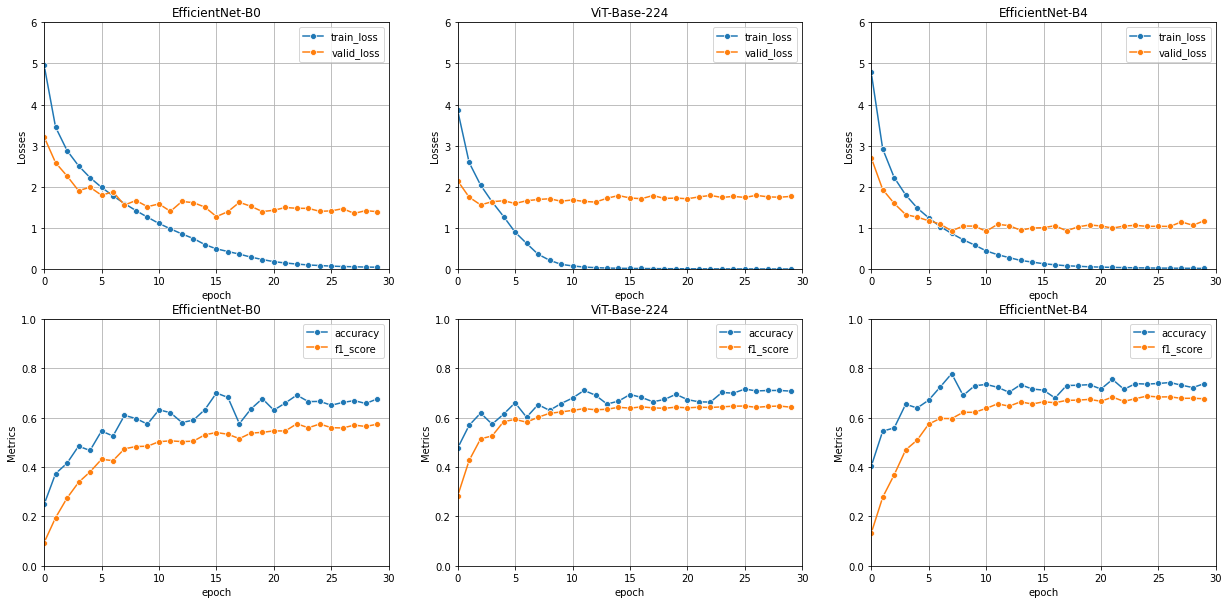

In [ ]:
results.compare_training_process(group_dict, xlim=[0, 30])